In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [28]:
data = np.load('./datasets/mnist_train_small.npy')

In [29]:
data

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [30]:
X = data[:, 1:]
y = data[:, 0]

In [31]:
X.shape, y.shape

((19999, 784), (19999,))

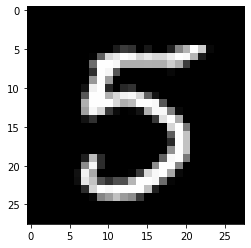

In [32]:
plt.imshow(X[0].reshape(28,28), cmap='gray')

In [33]:
y[0]

5

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model = KNeighborsClassifier()

In [37]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [39]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [40]:
model.score(X_test[:100], y_test[:100])

0.95

## Custom KNN Implementation

In [41]:
class CustomKNN:
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
        
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() 
        self._y = y
    
    def predict_point(self, point):
        list_dist = []
        
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)
    
    

In [42]:
m2 = CustomKNN()

In [43]:
m2.fit(X_train, y_train)

In [44]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [45]:
y_train

array([4, 0, 4, ..., 9, 9, 7], dtype=uint8)

In [46]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [47]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [48]:
m2.score(X_test[:100], y_test[:100])

0.95